In [2]:
import pandas as pd
pd.set_option('display.max_rows', 15)  # 모든 행을 출력하도록 설정
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore') # 경고 메세지 OFF

In [3]:
Brad = pd.read_csv('/home/user/exercise_j/TwitterXAPI/BradGarlingHouse_classified.csv')
Digital = pd.read_csv('/home/user/exercise_j/TwitterXAPI/DigitalAssetInvestor_classified.csv')
hayden = pd.read_csv('/home/user/exercise_j/TwitterXAPI/hayden_eth_classified.csv')
SHELDON = pd.read_csv('/home/user/exercise_j/TwitterXAPI/SHELDONEVAN_classified.csv')
Stuart = pd.read_csv('/home/user/exercise_j/TwitterXAPI/StuartAlderoty_classified.csv')
Bloomberg = pd.read_csv('/home/user/exercise_j/TwitterXAPI/BloombergCrypto_classified.csv')
Gavin = pd.read_csv('/home/user/exercise_j/TwitterXAPI/GavinWood_classified.csv')
Timbeiko = pd.read_csv('/home/user/exercise_j/TwitterXAPI/timbeiko_eth_classified.csv')
Arthur = pd.read_csv('/home/user/exercise_j/TwitterXAPI/ArthurHayes_classified.csv')
Jesse = pd.read_csv('/home/user/exercise_j/TwitterXAPI/JesseEckel_classified.csv')

In [4]:
df = pd.concat([Brad,Digital,hayden,SHELDON,Stuart,Bloomberg,Gavin,Timbeiko,Arthur,Jesse], axis=0)

# 인덱스 재설정 (필요한 경우)
df.reset_index(drop=True, inplace=True)

df

created_at  \
0      2024-01-18T17:40:59.000Z   
1      2024-01-16T18:00:16.000Z   
2      2024-01-16T18:00:16.000Z   
3      2024-01-16T10:15:03.000Z   
4      2024-01-10T21:57:09.000Z   
...                         ...   
19799  2021-10-22T20:22:43.000Z   
19800  2021-10-22T20:11:12.000Z   
19801  2021-09-14T14:13:32.000Z   
19802  2021-09-14T12:56:43.000Z   
19803  2021-08-25T14:23:55.000Z   

                                                    text  ticker  \
0      In the US, crypto is spending more time in the...     NaN   
1                    Any takers? https://t.co/KbKsCVOkLa  ticker   
2      “I do think the chair of the SEC, Gary Gensler...  ticker   
3      LFG!  2024 is going to be big. https://t.co/3C...  ticker   
4      The significance of this moment cannot be over...     BTC   
...                                                  ...     ...   
19799  @NiftyPhoebe @Strongblock_io @WithoutTheRope T...     NaN   
19800  @NiftyPhoebe @Strongblock_io @WithoutTheRope H...    NFTY   
19801        @Tripkebab @PancakeSwap This made me laugh😂     NaN   
19802  @PancakeSwap 8 Days away does anyone know what...     NaN   
19803  @3I0PIVgqnUMpUEv @PancakeSwap This is a great ...     NaN   

       sentiment_score  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.9  
...                ...  
19799              0.0  
19800              0.0  
19801              NaN  
19802              NaN  
19803              NaN  

[19804 rows x 4 columns]

In [5]:
df = df.dropna(subset=['sentiment_score', 'ticker'])

# 'created_at' 열을 날짜 형식으로 변환
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df['ticker'] = df['ticker'].str.replace('"', '')

# 결과 출력
print(df)

       created_at                                               text  ticker  \
1      2024-01-16                Any takers? https://t.co/KbKsCVOkLa  ticker   
2      2024-01-16  “I do think the chair of the SEC, Gary Gensler...  ticker   
3      2024-01-16  LFG!  2024 is going to be big. https://t.co/3C...  ticker   
4      2024-01-10  The significance of this moment cannot be over...     BTC   
5      2024-01-10  @TheStalwart Yep,  you’d be surprised how ofte...     XRP   
...           ...                                                ...     ...   
19792  2021-11-23  @ultrasoundEdik @romedaofinance I was thinking...    ROME   
19795  2021-11-22                 @juspect0x @romedaofinance I wish😭     ROM   
19796  2021-11-22  @_Mr__S__ @romedaofinance That’s soo good🙌🏻 Do...     RMD   
19797  2021-11-22  @jofnosso @romedaofinance It just looks like a...     TRX   
19800  2021-10-22  @NiftyPhoebe @Strongblock_io @WithoutTheRope H...    NFTY   

       sentiment_score  
1             

In [6]:
df['ticker'] = df['ticker'].str.replace('FTX', 'FTT')
# pd.set_option('display.max_rows', None)  # 모든 행을 출력하도록 설정
ticker_counts = df['ticker'].value_counts()
print(ticker_counts)

ticker
ticker        4259
ETH           3350
XRP           2028
BTC           1942
UNI           1218
              ... 
SCAM             1
LEV              1
kastrated        1
YGMI             1
BoredApeYC       1
Name: count, Length: 447, dtype: int64


#### 10개 이상의 트윗이 있는 티커 구분

In [7]:
tickers_to_keep = ticker_counts[ticker_counts > 9].index

# 해당하는 'ticker' 값만을 가진 행들을 유지
df_filtered = df[df['ticker'].isin(tickers_to_keep)]

# 결과 출력
ticker_counts2 = df_filtered['ticker'].value_counts()
print(ticker_counts2)

ticker
ticker    4259
ETH       3350
XRP       2028
BTC       1942
UNI       1218
          ... 
SHIB        11
DAI         11
Tether      10
GBTC        10
KSM         10
Name: count, Length: 40, dtype: int64


In [8]:
df_filtered = df_filtered[~df_filtered['ticker'].isin(['','ticker','LUNA','COIN','NFT','N/A','GMX','USDC','SBF','USDT','GBTC','KSM'])]
# df_filtered = df_filtered.reset_index(drop=True, inplace=True)
ticker_counts2 = df_filtered['ticker'].value_counts()
print(ticker_counts2)

ticker
ETH          3350
XRP          2028
BTC          1942
UNI          1218
SOL           835
             ... 
No Ticker      12
DAI            11
SHIB           11
YFI            11
Tether         10
Name: count, Length: 28, dtype: int64


In [9]:
df_filtered 

created_at                                               text ticker  \
4      2024-01-10  The significance of this moment cannot be over...    BTC   
5      2024-01-10  @TheStalwart Yep,  you’d be surprised how ofte...    XRP   
6      2024-01-09  Days like this remind me that 1/ the SEC shoul...    BTC   
9      2023-12-20  RT @s_alderoty: Biggest crypto story of  2023:...    XRP   
10     2023-12-20  .@Ripple is heading into 2024 with a complianc...    XRP   
...           ...                                                ...    ...   
19749  2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   
19755  2022-02-18     @NicoBreilNadal8 It was silly sushi by Foodgod  SUSHI   
19775  2021-12-13  @AimanK_LDN @avaxboyvn @Wonderland_fi were you...   AVAX   
19776  2021-12-13  @avaxboyvn @Wonderland_fi Thanks it isn't work...   AVAX   
19797  2021-11-22  @jofnosso @romedaofinance It just looks like a...    TRX   

       sentiment_score  
4                 0.90  
5                -0.50  
6                 0.00  
9                 0.80  
10                0.00  
...                ...  
19749             0.75  
19755             0.00  
19775             0.00  
19776            -0.50  
19797             0.80  

[10528 rows x 4 columns]

In [10]:
a = df_filtered.reset_index(drop=True)
print(a)

       created_at                                               text ticker  \
0      2024-01-10  The significance of this moment cannot be over...    BTC   
1      2024-01-10  @TheStalwart Yep,  you’d be surprised how ofte...    XRP   
2      2024-01-09  Days like this remind me that 1/ the SEC shoul...    BTC   
3      2023-12-20  RT @s_alderoty: Biggest crypto story of  2023:...    XRP   
4      2023-12-20  .@Ripple is heading into 2024 with a complianc...    XRP   
...           ...                                                ...    ...   
10523  2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   
10524  2022-02-18     @NicoBreilNadal8 It was silly sushi by Foodgod  SUSHI   
10525  2021-12-13  @AimanK_LDN @avaxboyvn @Wonderland_fi were you...   AVAX   
10526  2021-12-13  @avaxboyvn @Wonderland_fi Thanks it isn't work...   AVAX   
10527  2021-11-22  @jofnosso @romedaofinance It just looks like a...    TRX   

       sentiment_score  
0                 0.90  
1

#### 데이터 분포 시계열 시각화

In [11]:
import matplotlib.pyplot as plt

In [12]:
print(ticker_counts2)

ticker
ETH          3350
XRP          2028
BTC          1942
UNI          1218
SOL           835
             ... 
No Ticker      12
DAI            11
SHIB           11
YFI            11
Tether         10
Name: count, Length: 28, dtype: int64


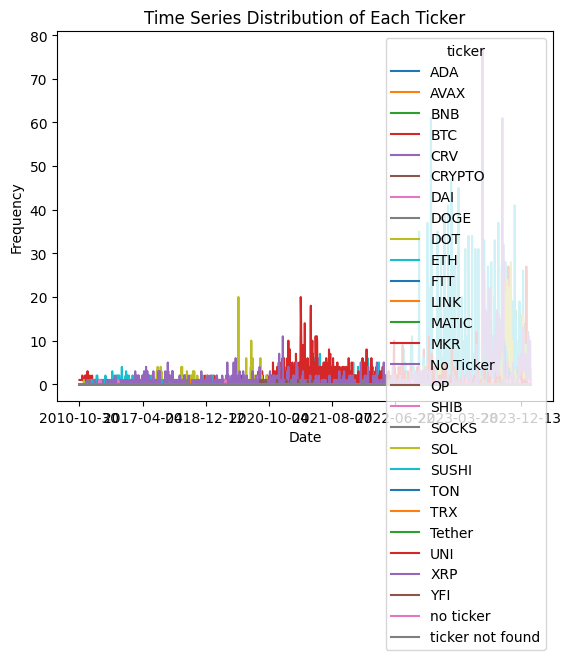

In [13]:
df_grouped = df_filtered.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()

#### 100개 이상의 트윗으로 다시 정리

In [19]:
df_filtered2 = df_filtered[~df_filtered['ticker'].isin(['','MATIC','TRX','DOGE','LINK','TON','LUNA','COIN','NFT','N/A','GMX','USDC','SBF','USDT','GBTC','KSM','SOCKS','CRV','OP','ADA','MKR','SUSHI','no ticker','ticker not found', 'AVAX','CRYPTO','No Ticker','DAI','SHIB','YFI','Tether'])]
# df_filtered = df_filtered.reset_index(drop=True, inplace=True)
pd.set_option('display.max_rows', 15)
ticker_counts3 = df_filtered2['ticker'].value_counts()
print(ticker_counts3)

ticker
ETH    3350
XRP    2028
BTC    1942
UNI    1218
SOL     835
DOT     420
BNB     188
FTT     137
Name: count, dtype: int64


In [27]:
b = df_filtered2.reset_index(drop=True)
b.to_csv('10000Tweets_Crypto_data.csv',index=False)
print(b)

      created_at                                               text ticker  \
0     2024-01-10  The significance of this moment cannot be over...    BTC   
1     2024-01-10  @TheStalwart Yep,  you’d be surprised how ofte...    XRP   
2     2024-01-09  Days like this remind me that 1/ the SEC shoul...    BTC   
3     2023-12-20  RT @s_alderoty: Biggest crypto story of  2023:...    XRP   
4     2023-12-20  .@Ripple is heading into 2024 with a complianc...    XRP   
...          ...                                                ...    ...   
10113 2022-05-03  What good long term projects are making you th...    BTC   
10114 2022-05-01  Unpopular opinion: Kylo Ren should’ve been the...    BTC   
10115 2022-05-01  Project under 100 million marketcap  that you ...    BTC   
10116 2022-04-29  @simsalacrypto Really? I think people will fom...    ETH   
10117 2022-04-29  Will Ethereum 2.0 upgrade kick off the next bu...    ETH   

       sentiment_score  
0                 0.90  
1            

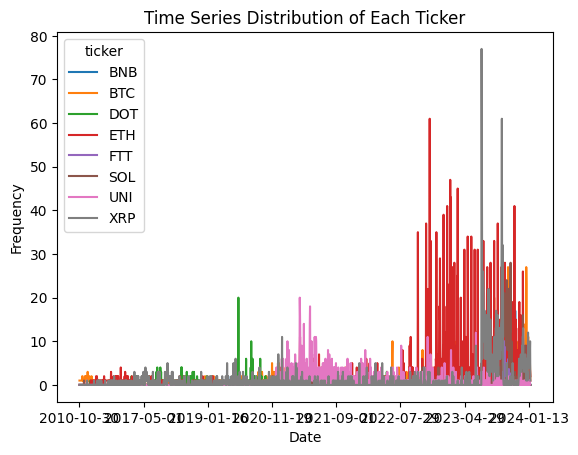

In [21]:
df_grouped2 = df_filtered2.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped2.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()

In [22]:
pd.set_option('display.max_rows', 15)  # 모든 행을 출력하도록 설정
date_counts = df_filtered2['created_at'].value_counts()
date_counts

created_at
2023-07-13    87
2023-09-30    77
2023-10-04    71
2023-09-14    69
2023-08-31    69
              ..
2018-12-14     1
2018-11-26     1
2018-11-25     1
2018-11-24     1
2018-11-21     1
Name: count, Length: 1757, dtype: int64

#### 2023 9.30 ~ 2023. 12.31 (3개월) 기간의 데이터 확인

시계열 데이터의 개수 총합: 2282
ticker
SOL    657
BTC    580
ETH    469
XRP    323
FTT    119
BNB    105
UNI     24
DOT      5
Name: count, dtype: int64


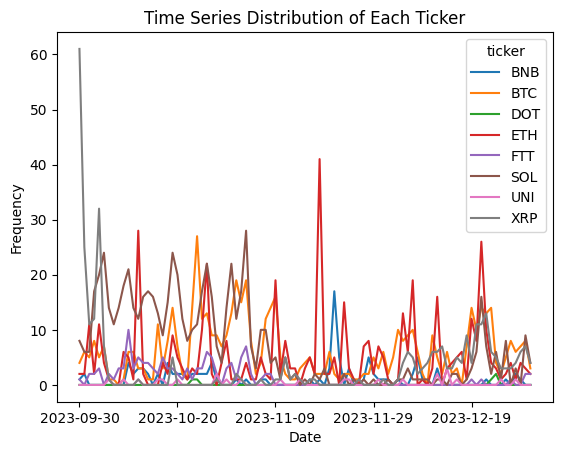

In [23]:
start_date = '2023-09-30'
end_date = '2023-12-31'
filtered_df3 = df_filtered2[(df['created_at'] >= start_date) & (df_filtered2['created_at'] <= end_date)]
filtered_df3.reset_index(drop=True, inplace=True)
abc = filtered_df3['ticker'].value_counts()

print(f"시계열 데이터의 개수 총합: {len(filtered_df3)}")
print(abc)

df_grouped3 = filtered_df3.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

# 시계열 그래프 그리기
df_grouped3.T.plot(kind='line') # 'bar'는 막대 그래프, 'line'은 선 그래프
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Distribution of Each Ticker')
plt.show()
# 결과 출력

#### 시계열 3개월 단위 분석

In [24]:
end_date = pd.to_datetime('2023-12-31')
# 'created_at' 컬럼을 날짜/시간 타입으로 변환
df_filtered2['created_at'] = pd.to_datetime(df_filtered2['created_at'])


시계열 데이터의 개수 총합 (2023-10-01 to 2023-12-31): 2205
ticker
SOL    649
BTC    576
ETH    467
XRP    262
FTT    118
BNB    104
UNI     24
DOT      5
Name: count, dtype: int64


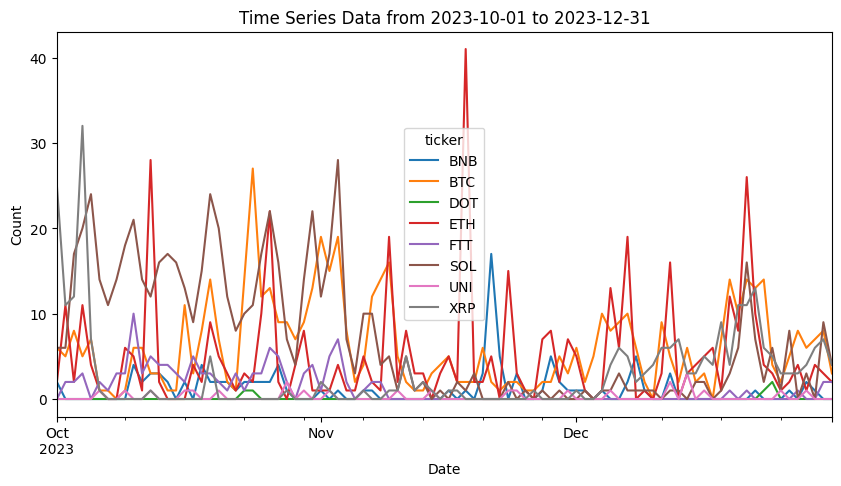

시계열 데이터의 개수 총합 (2023-07-01 to 2023-09-30): 2030
ticker
XRP    1024
ETH     529
BTC     303
SOL      83
UNI      42
BNB      38
FTT       9
DOT       2
Name: count, dtype: int64


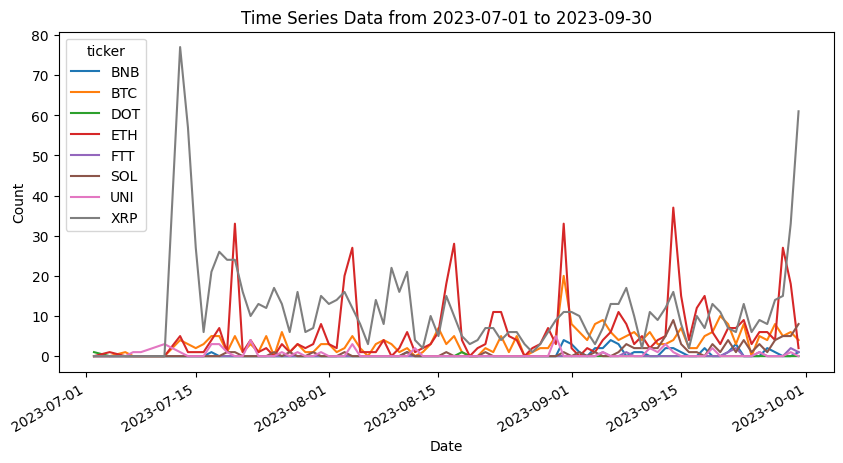

시계열 데이터의 개수 총합 (2023-03-31 to 2023-06-30): 631
ticker
ETH    450
BTC     75
UNI     54
XRP     37
SOL      6
BNB      5
DOT      4
Name: count, dtype: int64


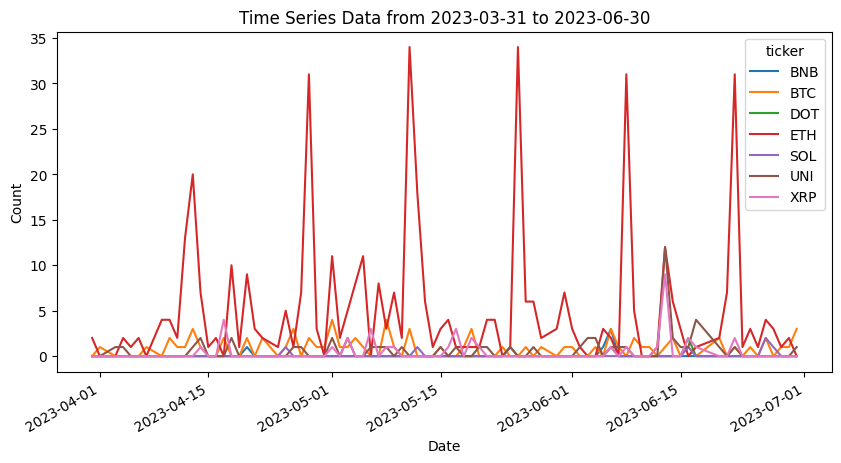

시계열 데이터의 개수 총합 (2023-01-01 to 2023-03-31): 1105
ticker
ETH    815
BTC    180
UNI     65
XRP     17
SOL     14
BNB      6
DOT      5
FTT      3
Name: count, dtype: int64


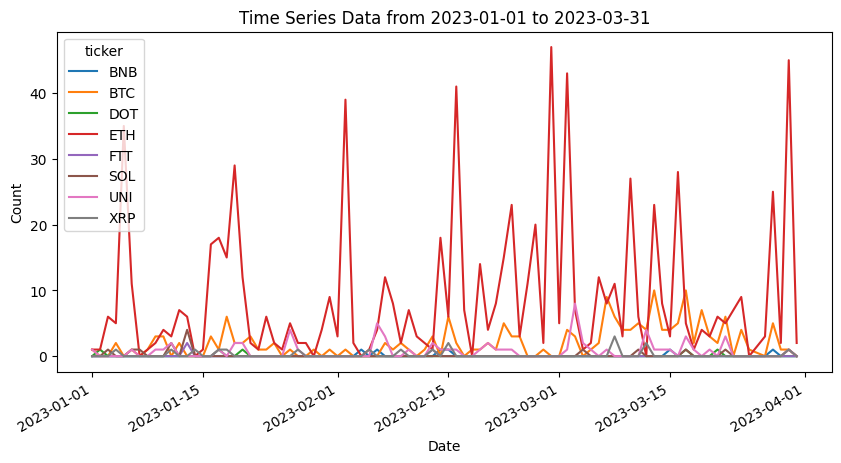

시계열 데이터의 개수 총합 (2022-10-01 to 2022-12-31): 616
ticker
ETH    332
UNI     92
BTC     84
SOL     40
XRP     34
BNB     14
DOT     14
FTT      6
Name: count, dtype: int64


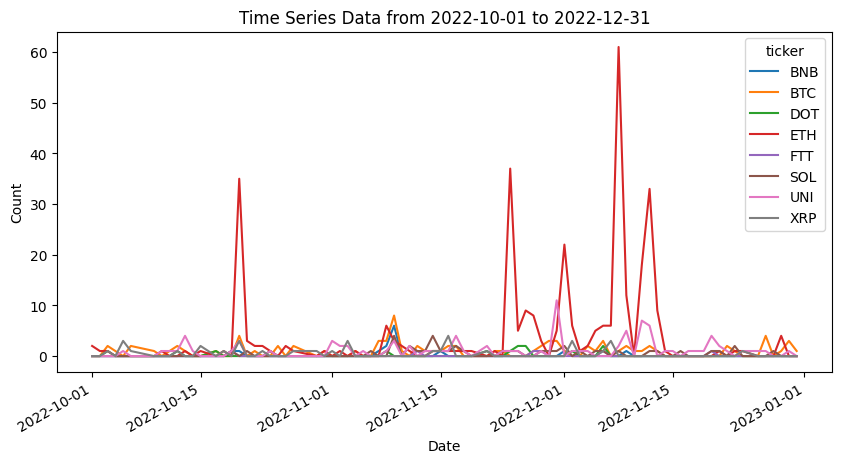

시계열 데이터의 개수 총합 (2022-07-01 to 2022-09-30): 262
ticker
ETH    101
BTC     71
UNI     56
XRP     19
DOT      7
SOL      6
BNB      2
Name: count, dtype: int64


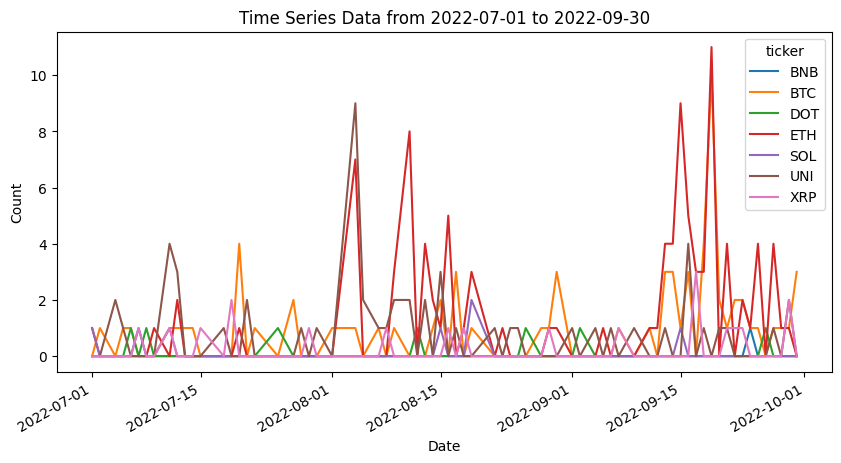

시계열 데이터의 개수 총합 (2022-03-31 to 2022-06-30): 174
ticker
UNI    57
BTC    49
ETH    30
XRP    24
DOT    13
SOL     1
Name: count, dtype: int64


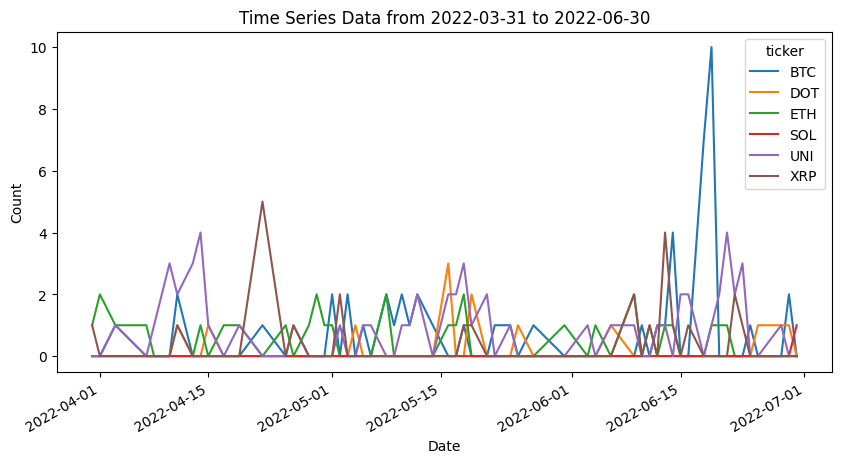

시계열 데이터의 개수 총합 (2022-01-01 to 2022-03-31): 234
ticker
UNI    83
ETH    65
XRP    28
DOT    27
BTC    25
SOL     5
BNB     1
Name: count, dtype: int64


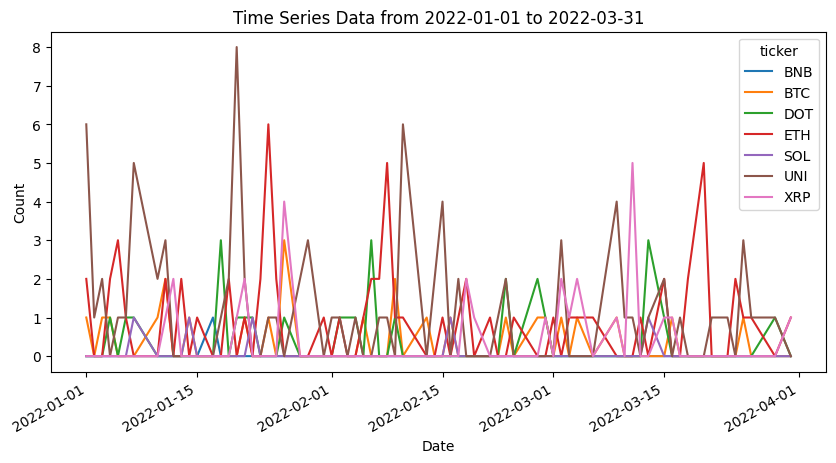

시계열 데이터의 개수 총합 (2021-10-01 to 2021-12-31): 197
ticker
UNI    72
BTC    42
ETH    40
XRP    21
DOT    16
SOL     6
Name: count, dtype: int64


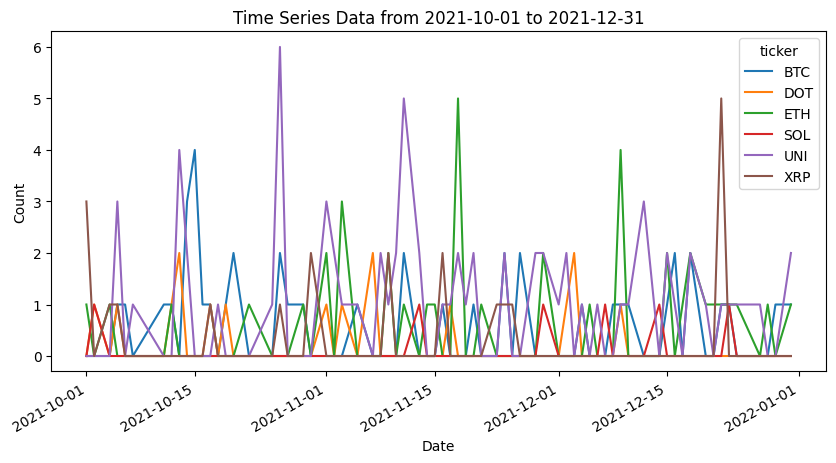

시계열 데이터의 개수 총합 (2021-07-01 to 2021-09-30): 268
ticker
UNI    144
ETH     70
BTC     24
XRP     18
DOT      9
SOL      2
BNB      1
Name: count, dtype: int64


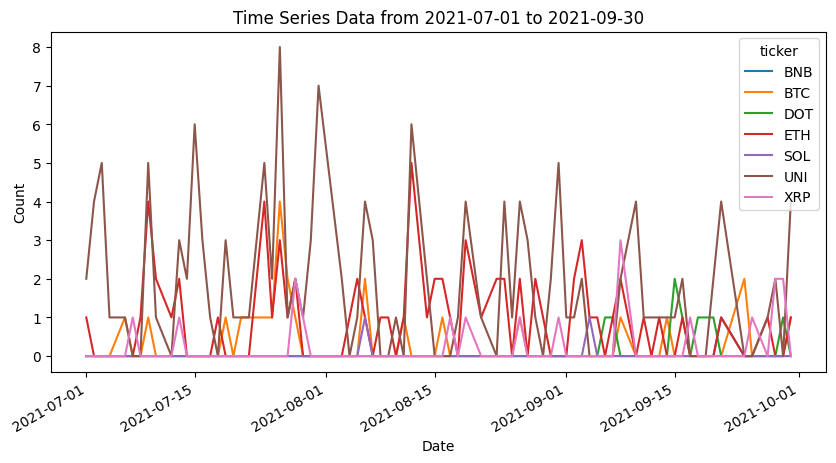

시계열 데이터의 개수 총합 (2021-03-31 to 2021-06-30): 441
ticker
UNI    278
ETH     86
BTC     42
XRP     20
SOL      8
DOT      4
BNB      3
Name: count, dtype: int64


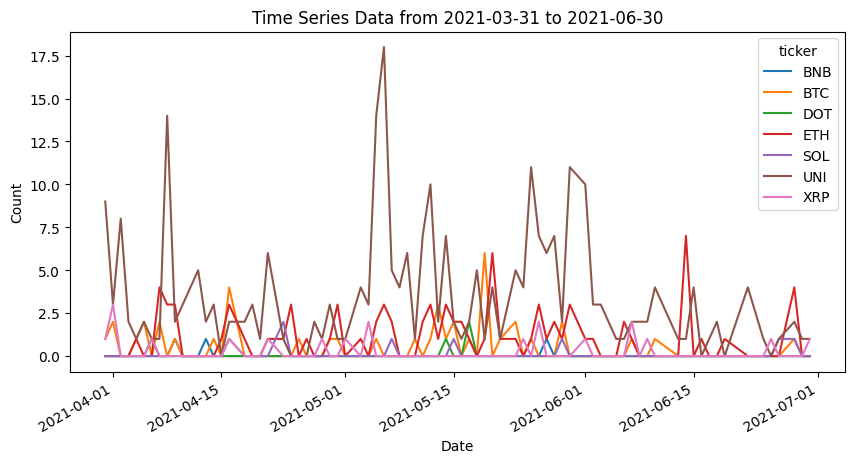

시계열 데이터의 개수 총합 (2021-01-01 to 2021-03-31): 443
ticker
UNI    219
ETH     89
BTC     58
XRP     50
DOT     17
SOL      6
BNB      4
Name: count, dtype: int64


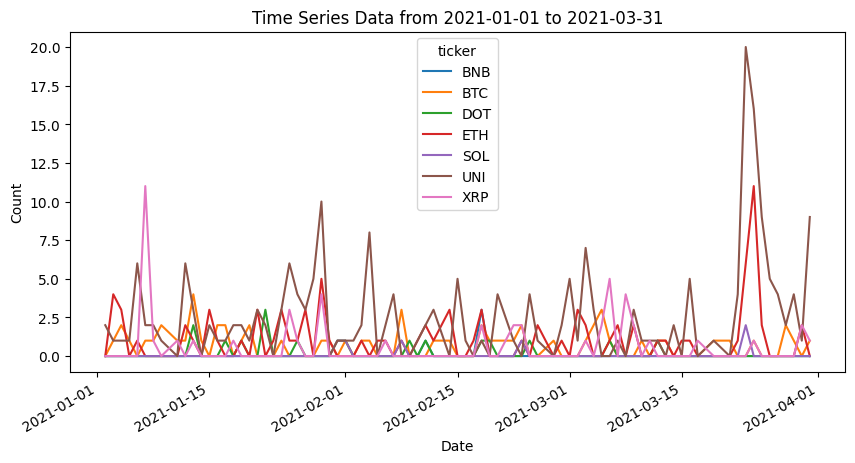

시계열 데이터의 개수 총합 (2020-10-01 to 2020-12-31): 149
ticker
BTC    53
XRP    41
UNI    30
ETH    17
DOT     6
SOL     1
BNB     1
Name: count, dtype: int64


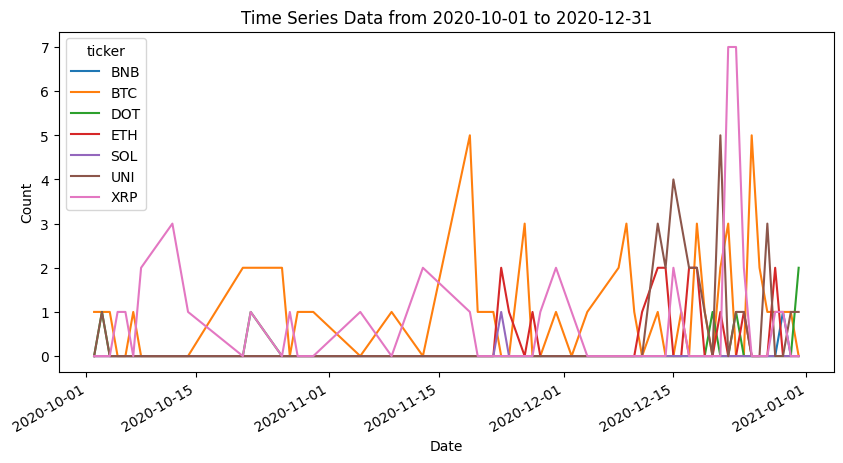

시계열 데이터의 개수 총합 (2020-07-01 to 2020-09-30): 83
ticker
DOT    30
BTC    28
XRP    17
ETH     4
UNI     4
Name: count, dtype: int64


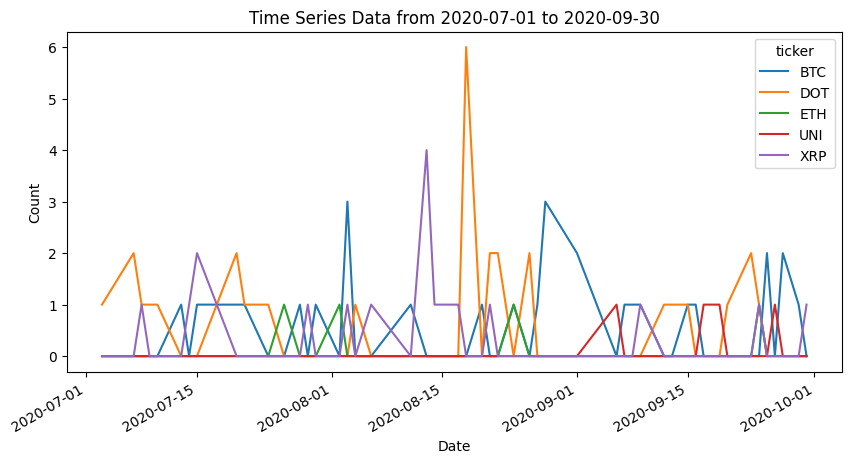

시계열 데이터의 개수 총합 (2020-03-31 to 2020-06-30): 74
ticker
DOT    38
XRP    22
BTC    13
UNI     1
Name: count, dtype: int64


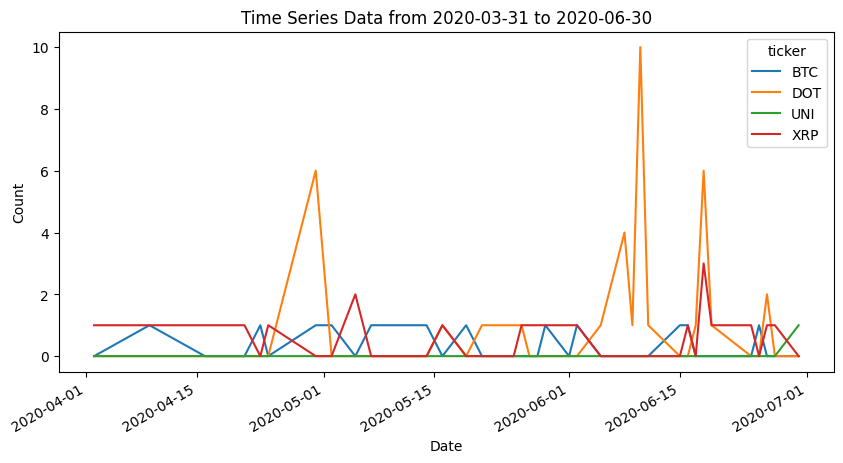

시계열 데이터의 개수 총합 (2020-01-01 to 2020-03-31): 34
ticker
XRP    15
DOT    10
BTC     9
Name: count, dtype: int64


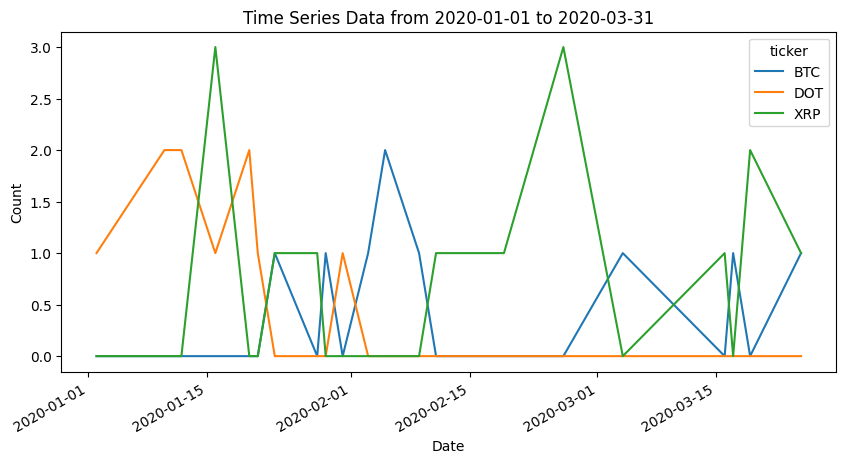

시계열 데이터의 개수 총합 (2019-10-01 to 2019-12-31): 82
ticker
DOT    41
XRP    34
BTC     7
Name: count, dtype: int64


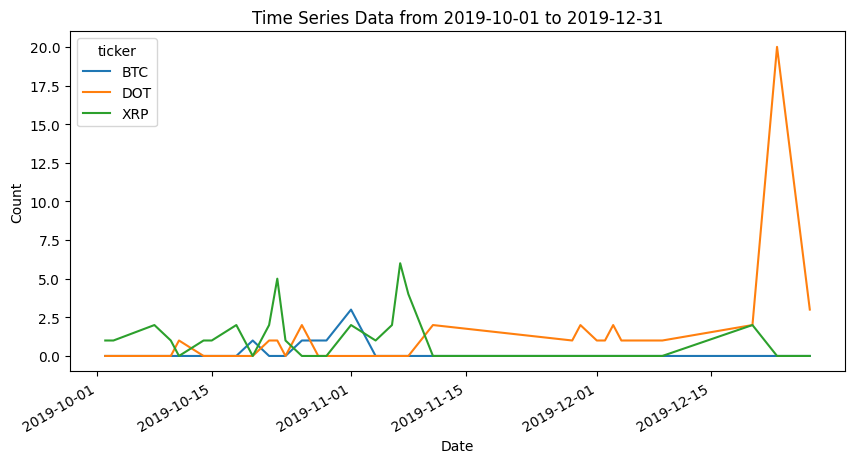

시계열 데이터의 개수 총합 (2019-07-01 to 2019-09-30): 52
ticker
XRP    33
BTC    11
DOT     4
BNB     3
ETH     1
Name: count, dtype: int64


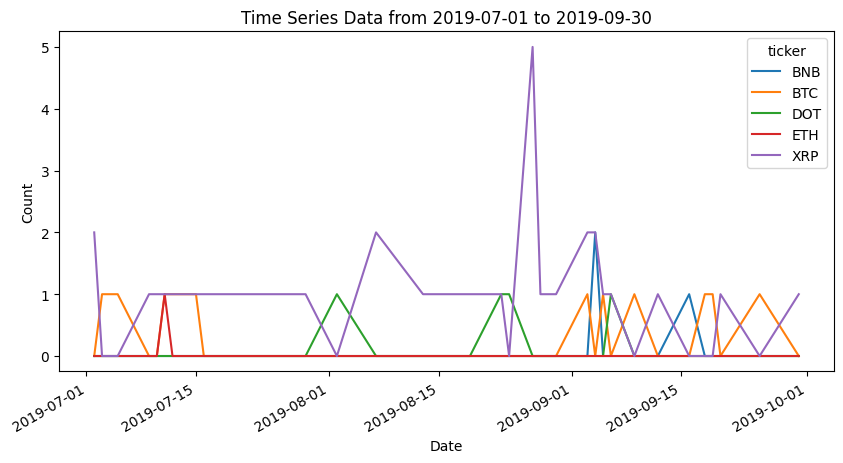

시계열 데이터의 개수 총합 (2019-03-31 to 2019-06-30): 39
ticker
BTC    21
XRP    14
BNB     2
DOT     1
ETH     1
Name: count, dtype: int64


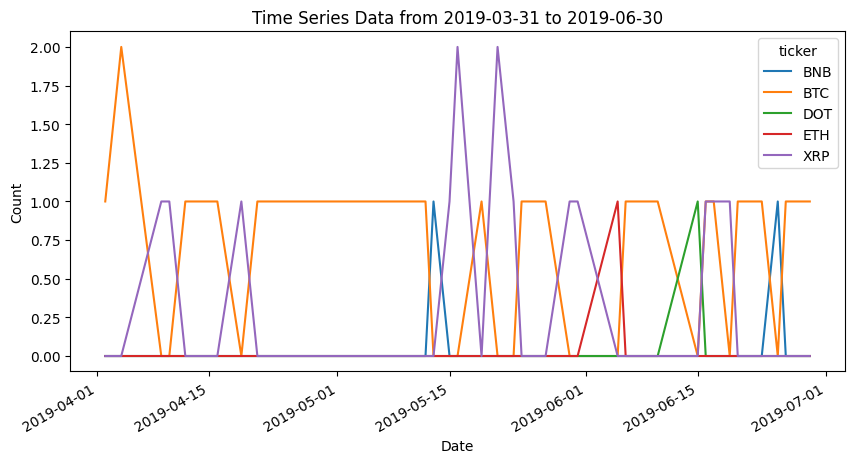

시계열 데이터의 개수 총합 (2019-01-01 to 2019-03-31): 36
ticker
XRP    13
BTC    12
ETH     6
DOT     5
Name: count, dtype: int64


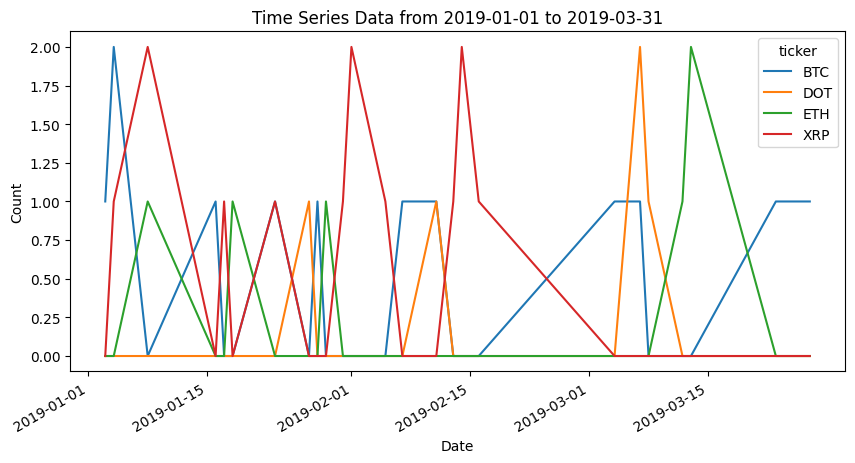

시계열 데이터의 개수 총합 (2018-10-01 to 2018-12-31): 32
ticker
XRP    11
BTC    11
ETH     5
DOT     5
Name: count, dtype: int64


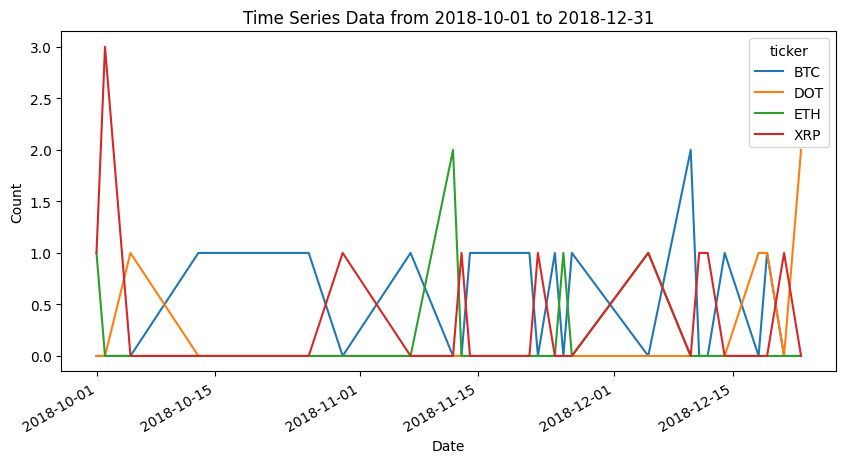

시계열 데이터의 개수 총합 (2018-07-01 to 2018-09-30): 52
ticker
DOT    32
XRP     7
BTC     7
ETH     4
BNB     2
Name: count, dtype: int64


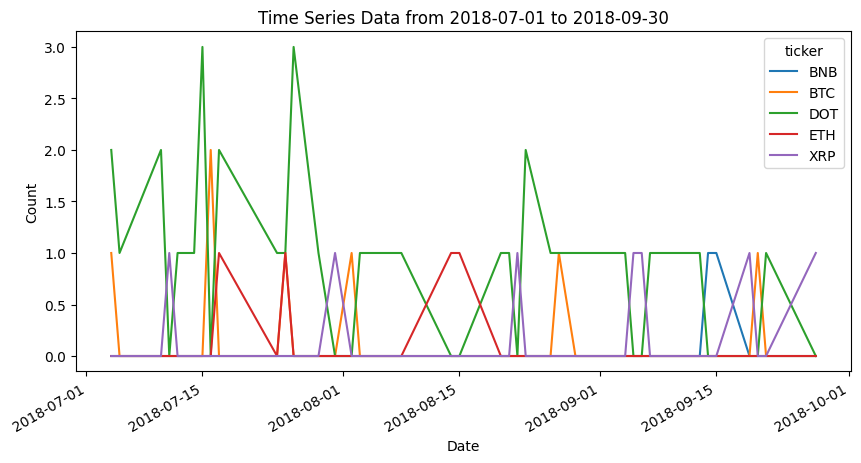

시계열 데이터의 개수 총합 (2018-03-31 to 2018-06-30): 78
ticker
DOT    46
BTC    11
ETH    11
XRP    10
Name: count, dtype: int64


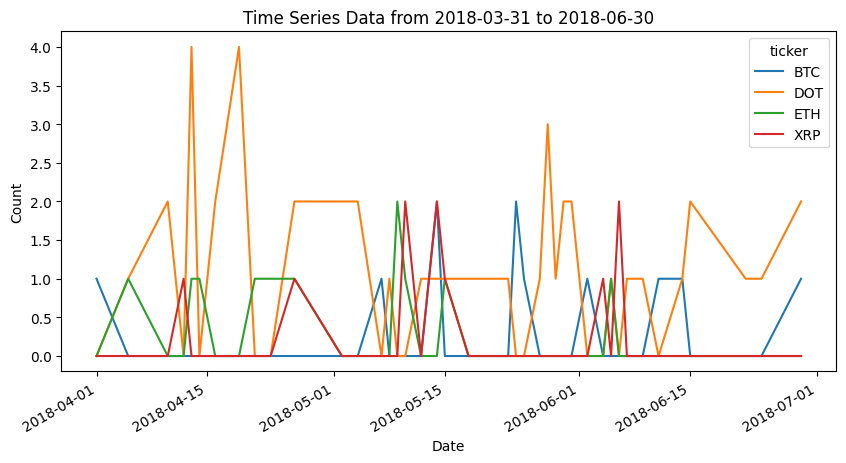

시계열 데이터의 개수 총합 (2018-01-01 to 2018-03-31): 50
ticker
XRP    24
ETH    13
DOT     9
BTC     4
Name: count, dtype: int64


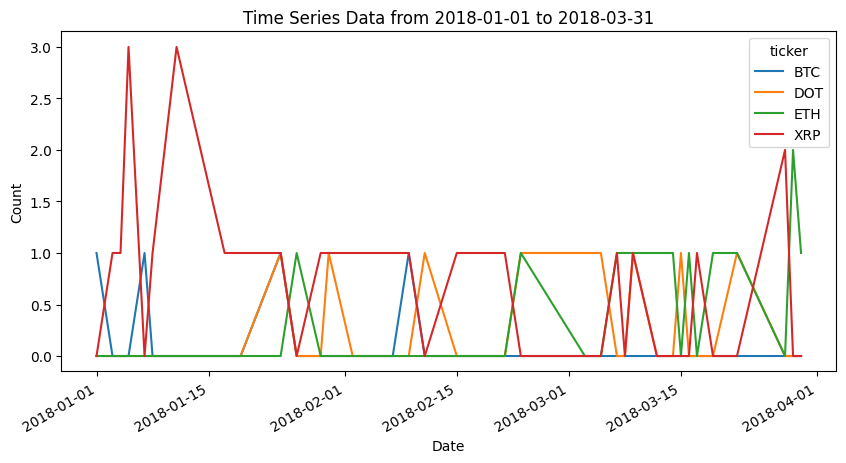

시계열 데이터의 개수 총합 (2017-10-01 to 2017-12-31): 99
ticker
XRP    48
DOT    32
ETH    11
BTC     8
Name: count, dtype: int64


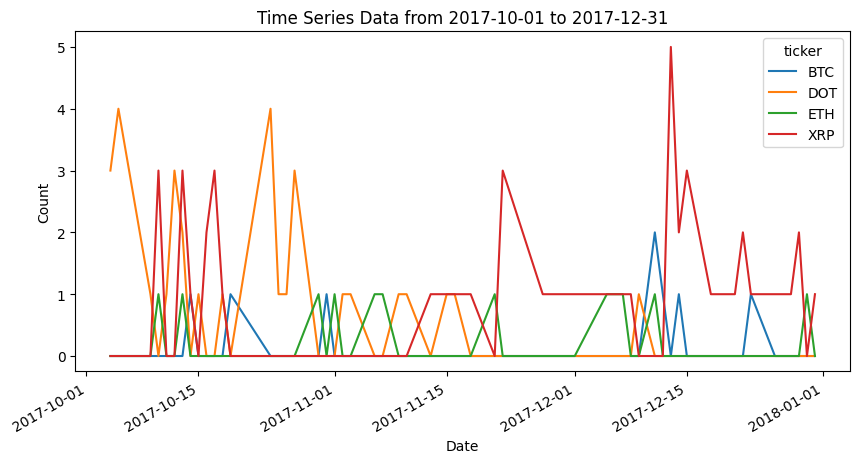

시계열 데이터의 개수 총합 (2017-07-01 to 2017-09-30): 54
ticker
DOT    28
XRP    11
ETH    10
BTC     5
Name: count, dtype: int64


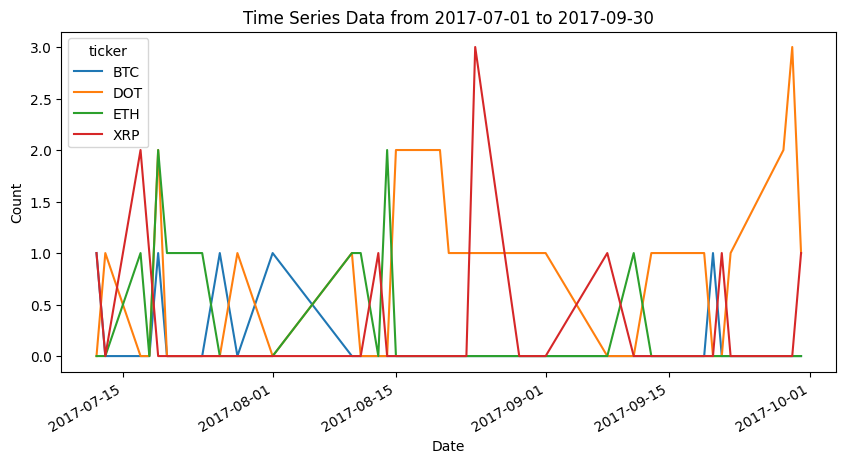

시계열 데이터의 개수 총합 (2017-03-31 to 2017-06-30): 42
ticker
XRP    34
BTC     4
ETH     4
Name: count, dtype: int64


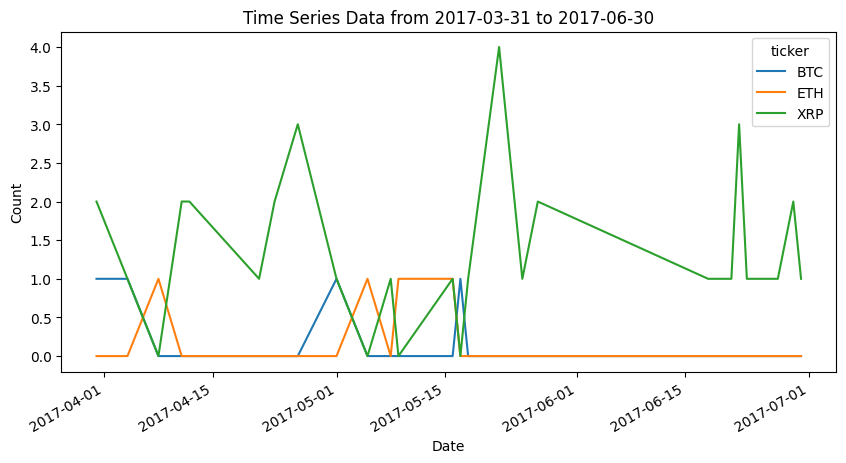

시계열 데이터의 개수 총합 (2017-01-01 to 2017-03-31): 39
ticker
XRP    21
DOT     7
ETH     7
BTC     4
Name: count, dtype: int64


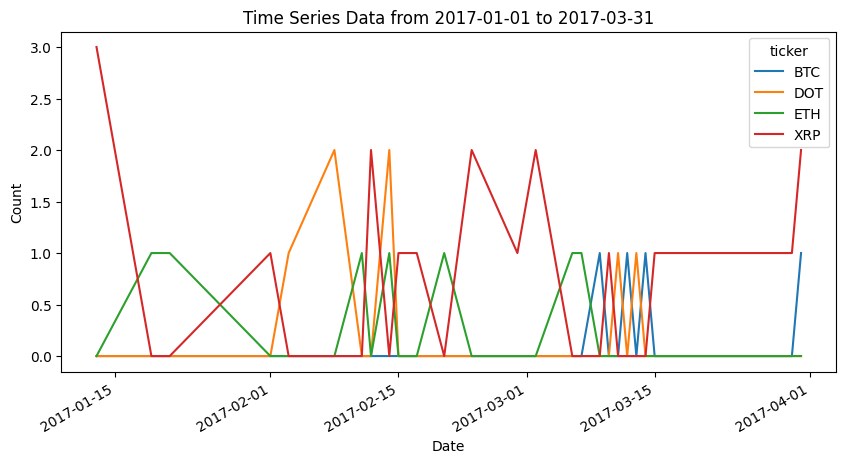

시계열 데이터의 개수 총합 (2016-10-01 to 2016-12-31): 34
ticker
ETH    23
BTC     5
XRP     4
DOT     2
Name: count, dtype: int64


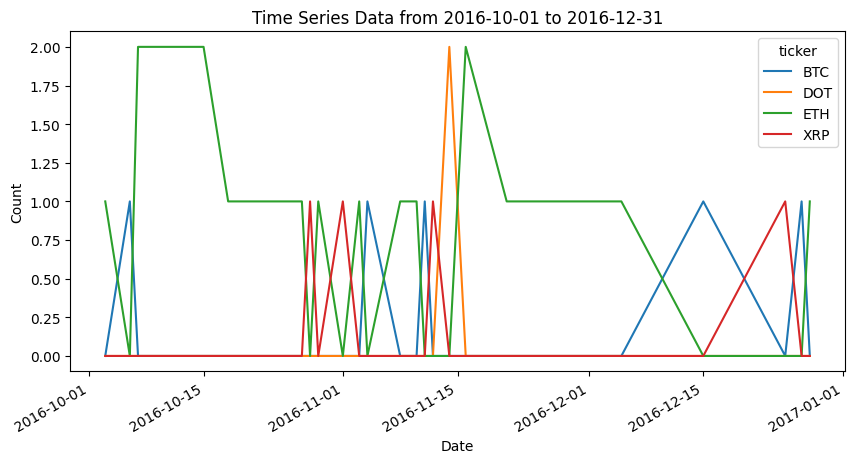

시계열 데이터의 개수 총합 (2016-07-01 to 2016-09-30): 38
ticker
ETH    24
XRP     9
BTC     5
Name: count, dtype: int64


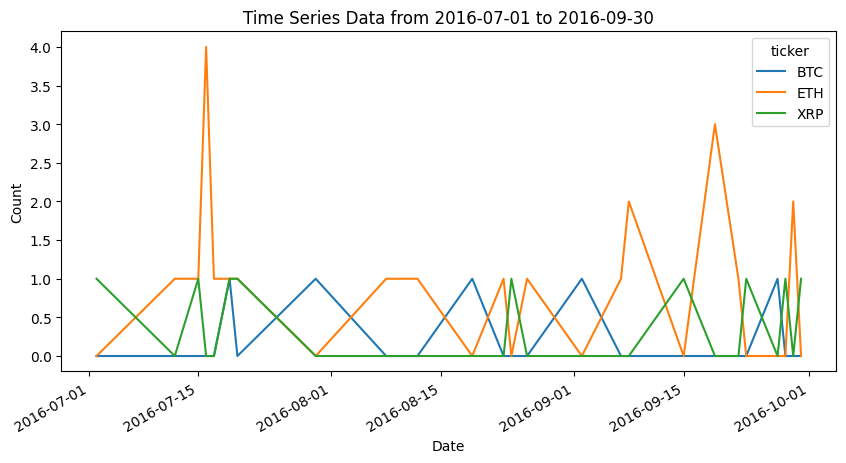

시계열 데이터의 개수 총합 (2016-03-31 to 2016-06-30): 30
ticker
ETH    25
XRP     4
BTC     1
Name: count, dtype: int64


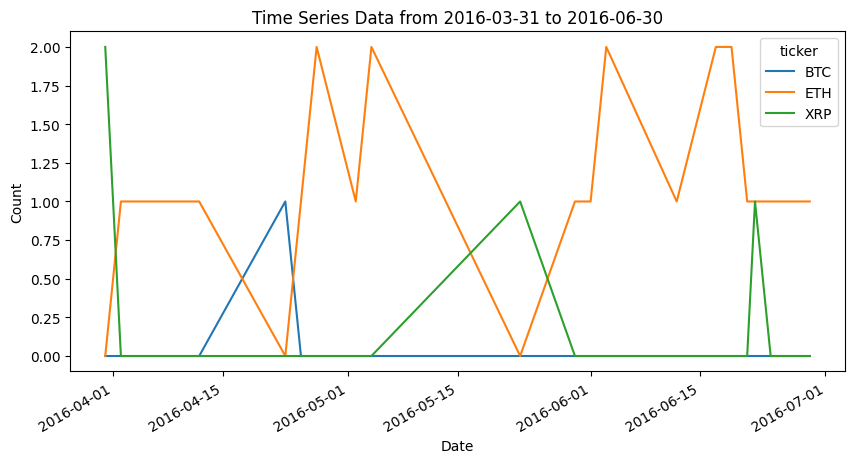

시계열 데이터의 개수 총합 (2016-01-01 to 2016-03-31): 29
ticker
ETH    19
XRP     8
BTC     2
Name: count, dtype: int64


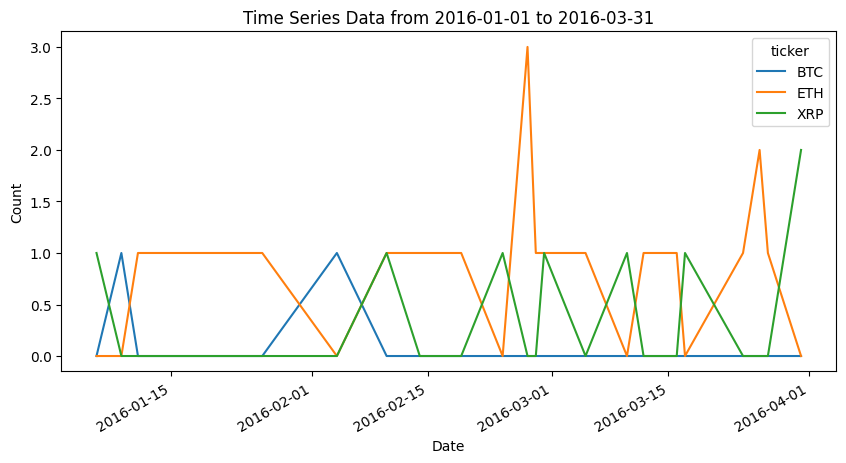

시계열 데이터의 개수 총합 (2015-10-01 to 2015-12-31): 22
ticker
ETH    20
XRP     1
BTC     1
Name: count, dtype: int64


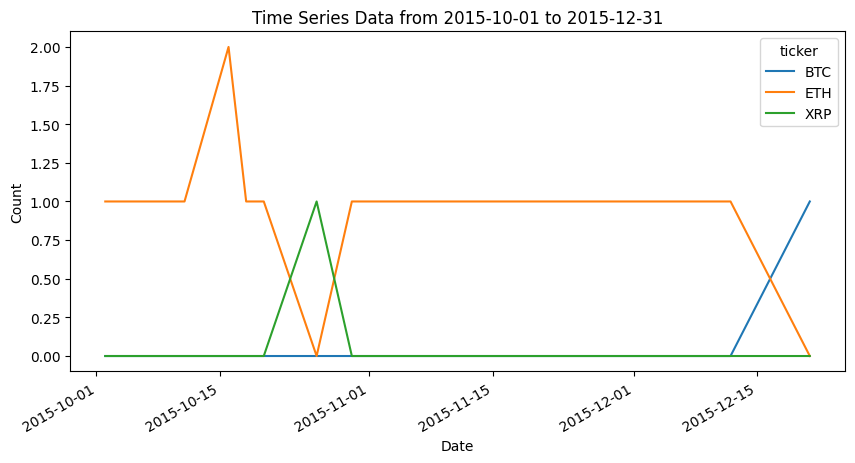

시계열 데이터의 개수 총합 (2015-07-01 to 2015-09-30): 15
ticker
ETH    9
BTC    4
XRP    2
Name: count, dtype: int64


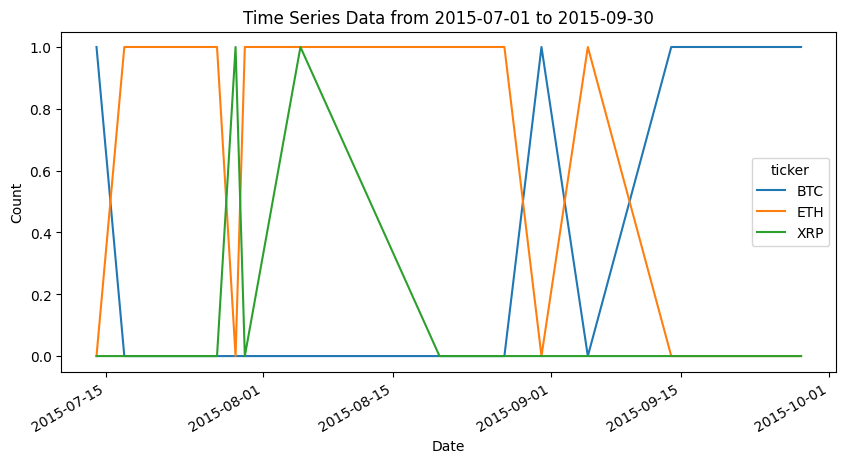

시계열 데이터의 개수 총합 (2015-03-31 to 2015-06-30): 21
ticker
ETH    14
XRP     4
BTC     3
Name: count, dtype: int64


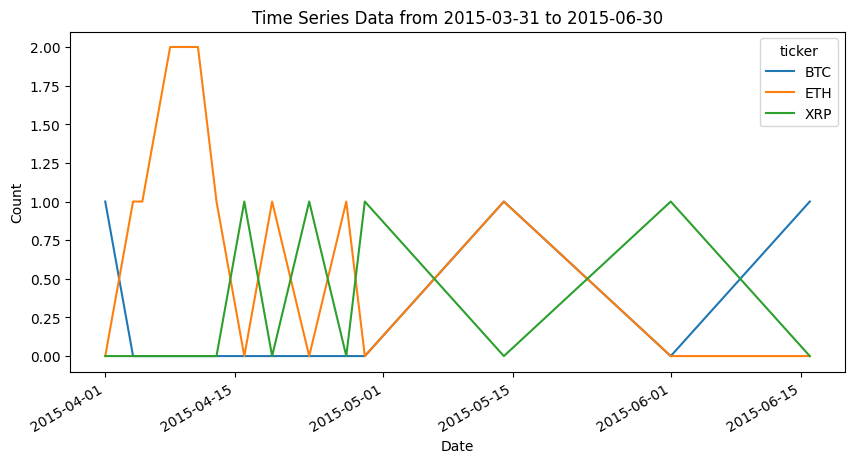

시계열 데이터의 개수 총합 (2015-01-01 to 2015-03-31): 5
ticker
ETH    3
XRP    1
BTC    1
Name: count, dtype: int64


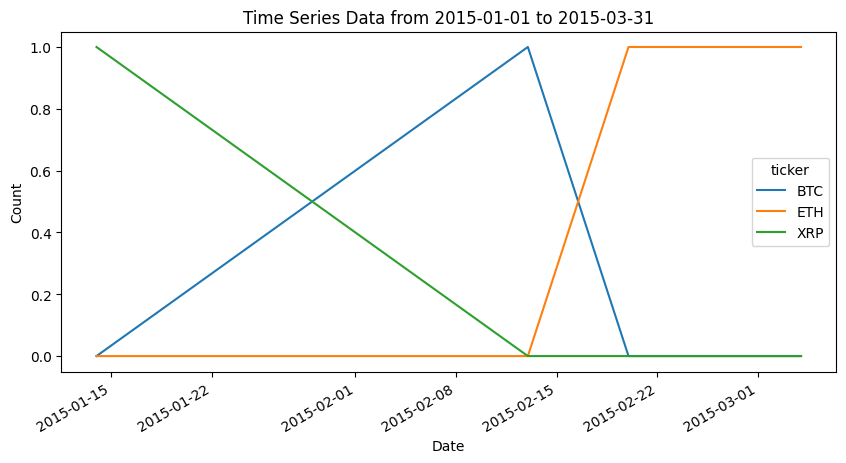

시계열 데이터의 개수 총합 (2014-10-01 to 2014-12-31): 8
ticker
BTC    4
ETH    4
Name: count, dtype: int64


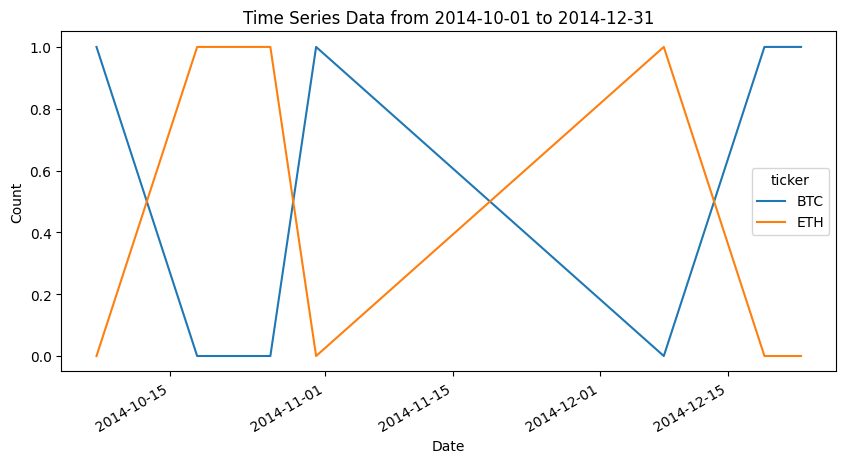

시계열 데이터의 개수 총합 (2014-07-01 to 2014-09-30): 4
ticker
BTC    3
ETH    1
Name: count, dtype: int64


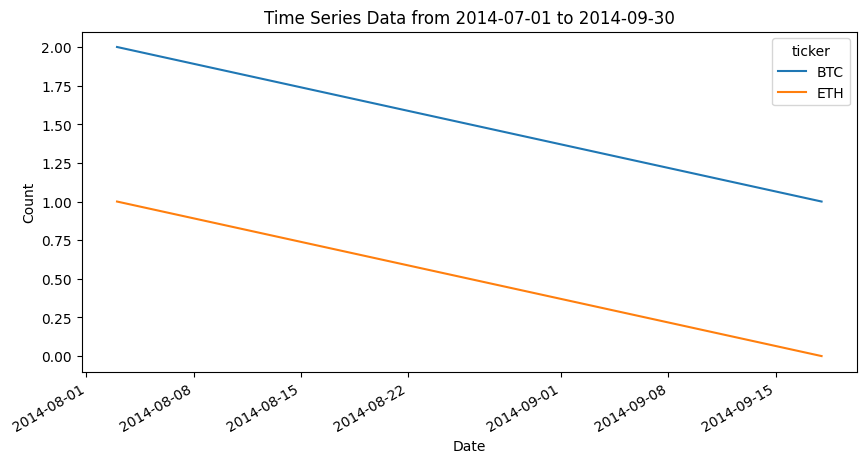

시계열 데이터의 개수 총합 (2014-03-31 to 2014-06-30): 4
ticker
ETH    3
DOT    1
Name: count, dtype: int64


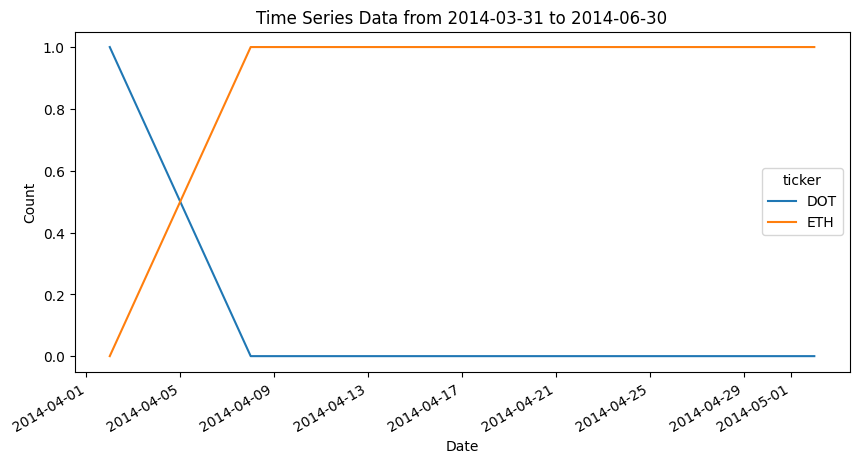

In [25]:
def process_and_plot_data(df, start, end):
    filtered_df = df[(df['created_at'] >= start) & (df['created_at'] <= end)]
    filtered_df.reset_index(drop=True, inplace=True)
    ticker_counts = filtered_df['ticker'].value_counts()
    print(f"시계열 데이터의 개수 총합 ({start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}): {len(filtered_df)}")
    print(ticker_counts)
    df_grouped = filtered_df.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)
    ax = df_grouped.T.plot(kind='line', figsize=(10, 5), title=f"Time Series Data from {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    plt.show()


for period in range(39):
    period_end = end_date - pd.DateOffset(months=3 * period)
    period_start = period_end - pd.DateOffset(months=3) + pd.DateOffset(days=1)
    process_and_plot_data(df_filtered2, period_start, period_end)

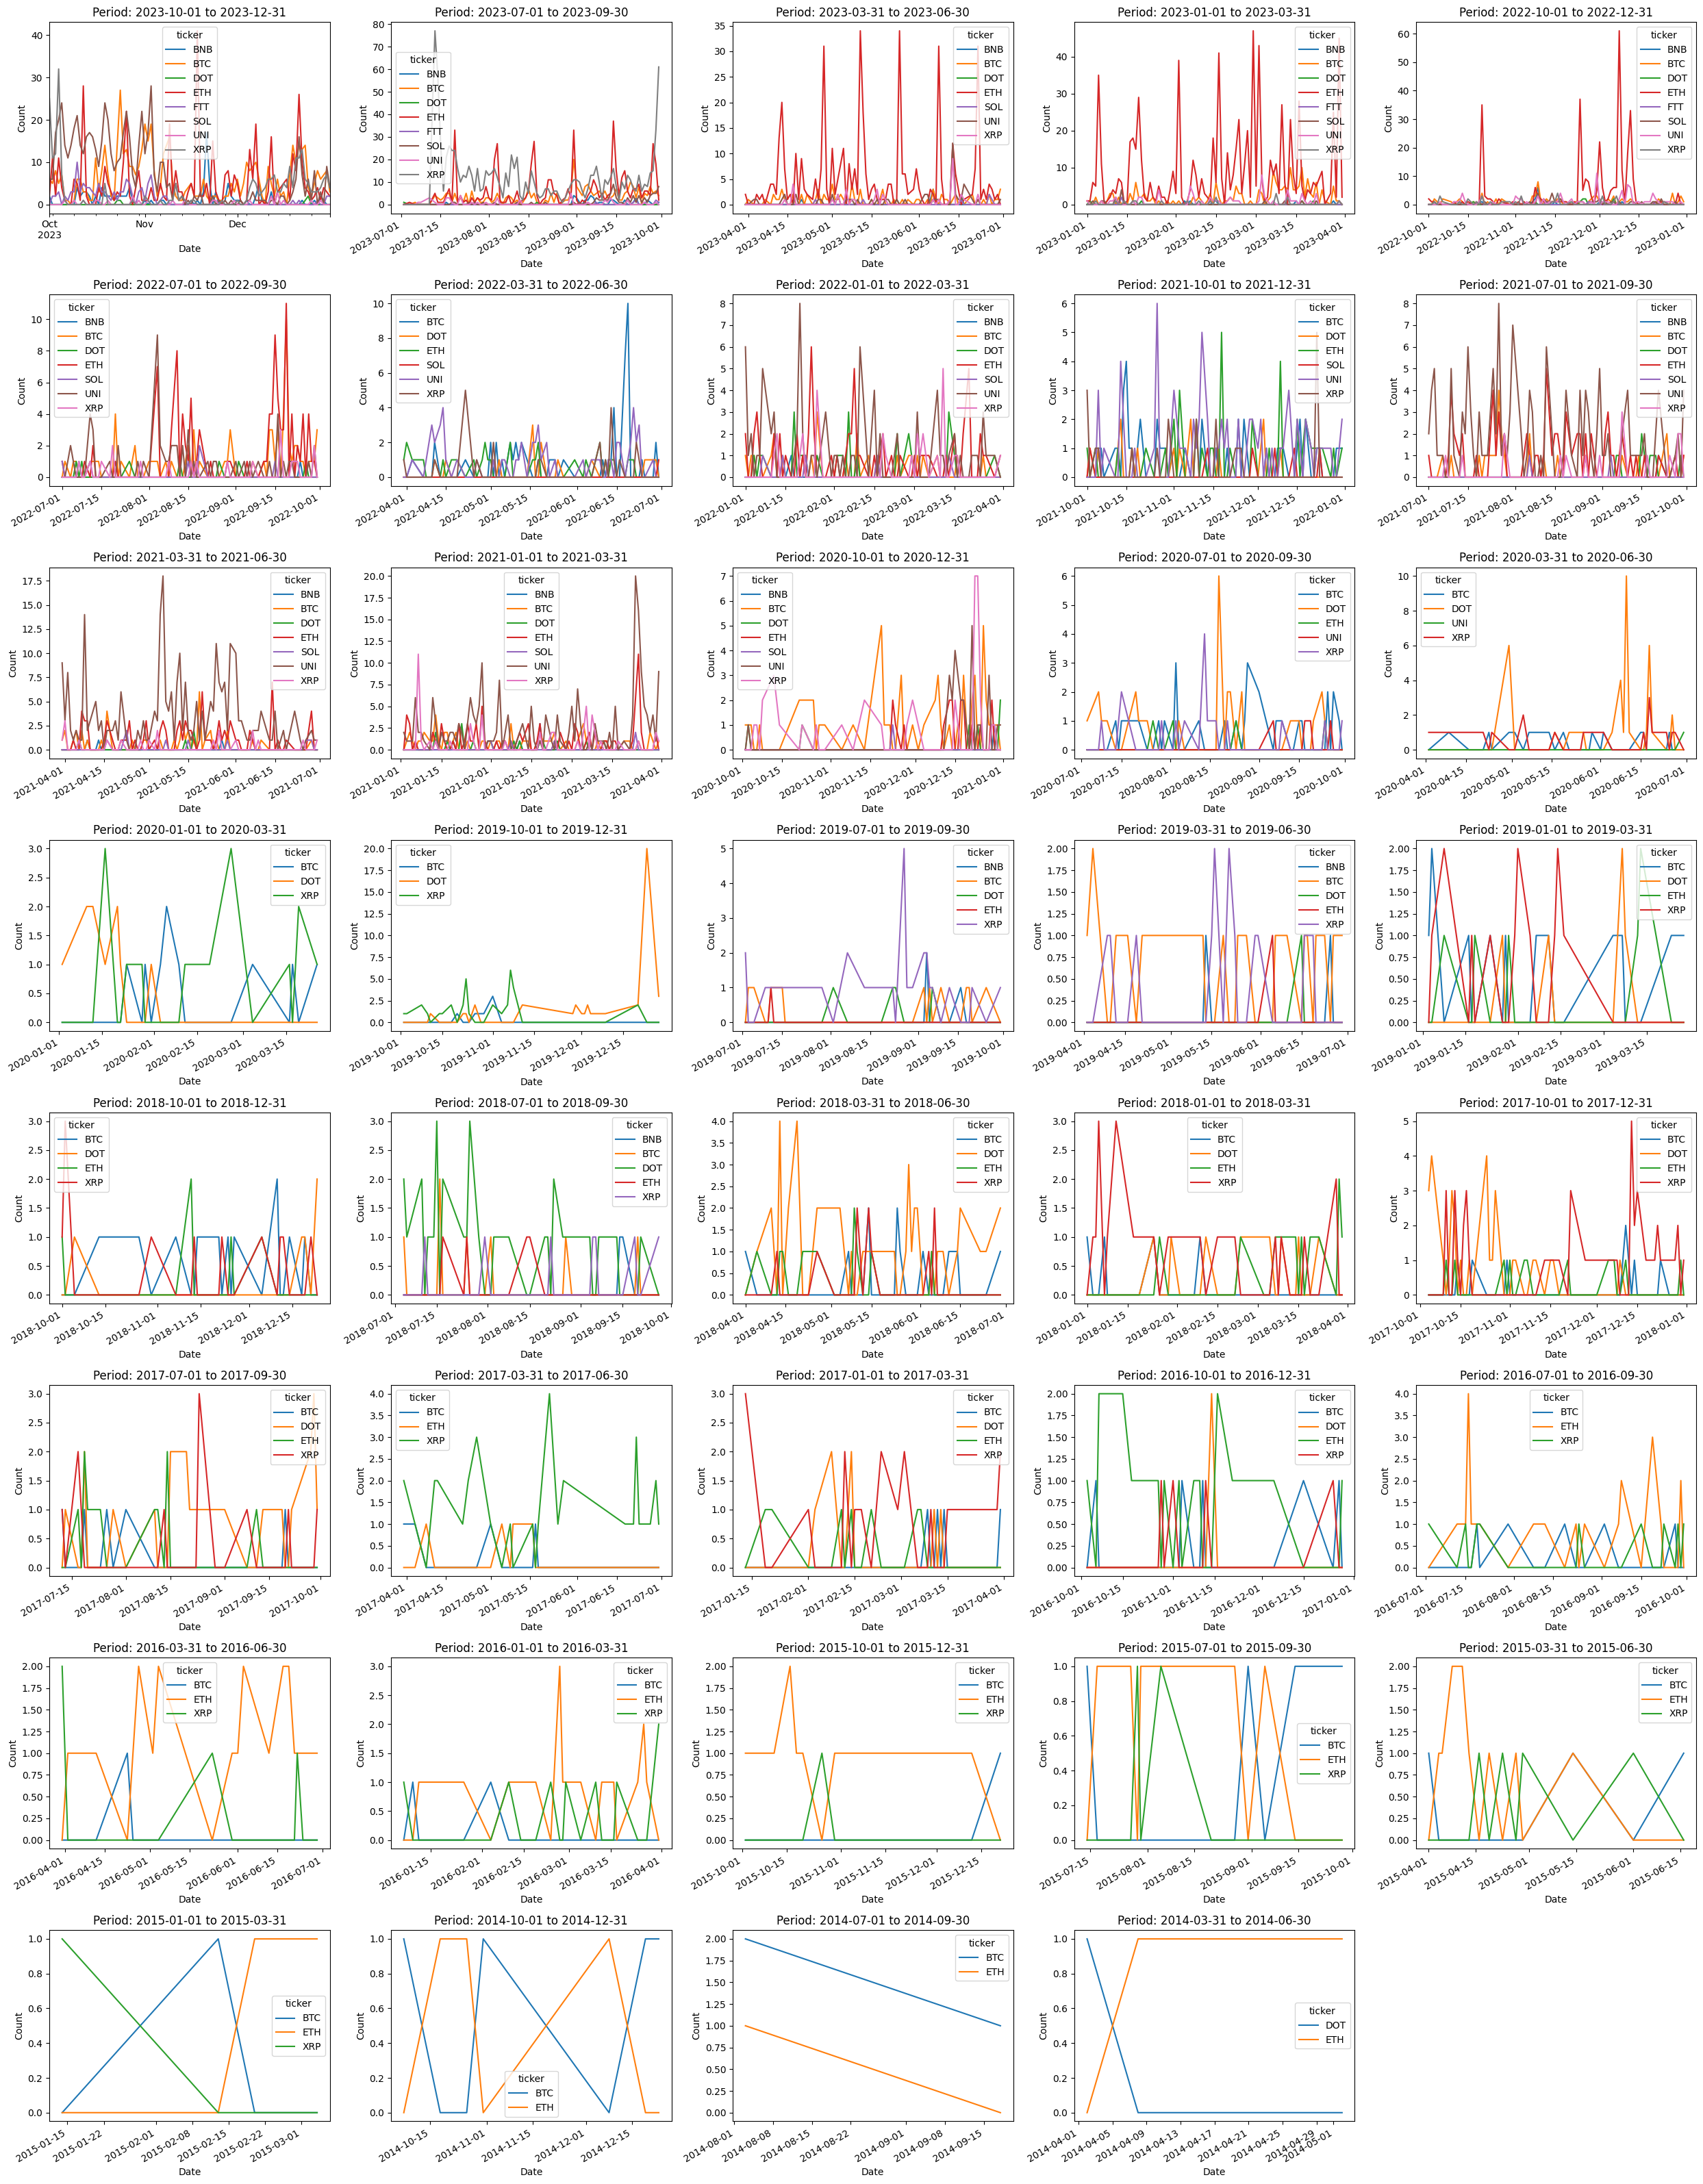

In [26]:
total_periods = 39
rows = (total_periods + 4) // 5  # 컬럼이 5개이므로

# 새로운 5개 컬럼의 서브플롯 그리드 생성
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(25, 4 * rows))

for period in range(total_periods):
    # 각 기간의 시작과 끝 날짜 계산
    period_end = end_date - pd.DateOffset(months=3 * period)
    period_start = period_end - pd.DateOffset(months=3) + pd.DateOffset(days=1)

    # 데이터 필터링
    filtered_df = df_filtered2[(df_filtered2['created_at'] >= period_start) & (df_filtered2['created_at'] <= period_end)]
    df_grouped = filtered_df.groupby(['ticker', 'created_at']).size().unstack(fill_value=0)

    # 서브플롯 위치 계산
    row = period // 5
    col = period % 5

    # 그래프 그리기
    df_grouped.T.plot(kind='line', ax=axes[row, col], title=f"Period: {period_start.strftime('%Y-%m-%d')} to {period_end.strftime('%Y-%m-%d')}")
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Count')

# 남은 빈 서브플롯 숨기기
for i in range(period + 1, rows * 5):
    fig.delaxes(axes[i // 5, i % 5])

# 레이아웃 조정
plt.tight_layout()
plt.show()